# Import Libraries

In [1]:
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import datetime as dt
from scipy.stats import mstats

# Load Data

In [2]:
df = pd.read_csv("train.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


# Data Preprocessing

In [3]:
df.duplicated().sum()

313

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df[df['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [7]:
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = df['Levy'].astype(float)

In [8]:
df['Levy'] = df['Levy'].fillna(df['Levy'].median())

In [9]:
df['Mileage'] = df['Mileage'].apply(lambda x: x.split(' ')[0])

In [10]:
df['Mileage'] = df['Mileage'].astype(np.int64)

In [11]:
df['Turbo']=df['Engine volume'].str.contains('Turbo')

In [12]:
df['Engine volume'] = df['Engine volume'].apply(lambda x: x.split(' ')[0])

In [13]:
df['Engine volume'] = df['Engine volume'].astype(float)

In [14]:
df['Doors'].value_counts()

Doors
04-May    18032
02-Mar      768
>5          124
Name: count, dtype: int64

In [15]:
df['Doors'] = df['Doors'].replace('04-May', '4')
df['Doors'] = df['Doors'].replace('02-Mar', '2')
df['Doors'] = df['Doors'].replace('>5', '5')

In [16]:
df['Doors'] = df['Doors'].astype(np.int64)

In [17]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

In [18]:
currt_time = dt.datetime.now()
df['Prod. year'] = currt_time.year - df['Prod. year'] 

In [19]:
wheels= pd.get_dummies(df[['Wheel','Drive wheels','Gear box type', 'Fuel type']], prefix=['Wheel','Drive', 'Gear', 'Fuel'])
df =pd.concat([df, wheels], axis=1)
df.drop(['Wheel','Drive wheels','Gear box type', 'Fuel type'], axis=1, inplace=True)

In [20]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18924 non-null  int64  
 1   Price                   18924 non-null  int64  
 2   Levy                    18924 non-null  float64
 3   Manufacturer            18924 non-null  int32  
 4   Model                   18924 non-null  int32  
 5   Prod. year              18924 non-null  int64  
 6   Category                18924 non-null  int32  
 7   Leather interior        18924 non-null  int32  
 8   Engine volume           18924 non-null  float64
 9   Mileage                 18924 non-null  int64  
 10  Cylinders               18924 non-null  float64
 11  Doors                   18924 non-null  int64  
 12  Color                   18924 non-null  int32  
 13  Airbags                 18924 non-null  int64  
 14  Turbo                   18924 non-null  boo

In [22]:
df.describe()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Doors,Color,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,868.498890,33.087349,821.805379,13.085764,6.266804,0.725587,2.306251,1.555373e+06,4.580216,3.925386,7.772194,6.568379
std,9.375468e+05,1.921356e+05,391.400489,17.787356,393.363886,5.665749,2.791944,0.446230,0.877591,4.880221e+07,1.200223,0.404138,5.361955,4.322323
min,2.074688e+07,1.000000e+00,87.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000,0.000000
25%,4.569501e+07,5.331000e+03,730.000000,21.000000,506.000000,9.000000,4.000000,0.000000,1.800000,7.019575e+04,4.000000,4.000000,1.000000,4.000000
50%,4.577191e+07,1.317200e+04,781.000000,32.000000,795.000000,12.000000,7.000000,1.000000,2.000000,1.264000e+05,4.000000,4.000000,7.000000,6.000000
75%,4.580174e+07,2.206300e+04,917.000000,54.000000,1183.000000,15.000000,9.000000,1.000000,2.500000,1.891198e+05,4.000000,4.000000,12.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,64.000000,1510.000000,85.000000,10.000000,1.000000,20.000000,2.147484e+09,16.000000,5.000000,15.000000,16.000000


# Boxplot & Correlation Matrix

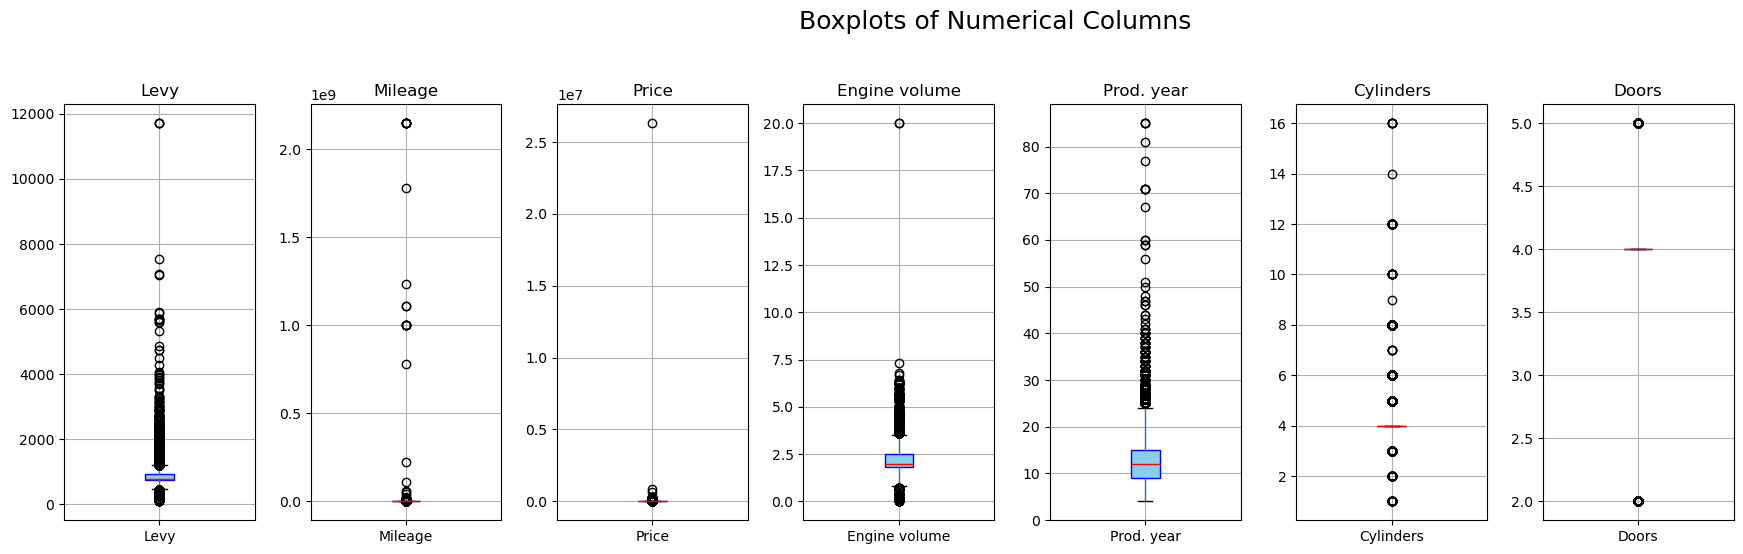

In [23]:
numeical_columns = ['Levy', 'Mileage', 'Price', 'Engine volume', 'Prod. year', 'Cylinders', 'Doors']
plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numeical_columns, 1):
    plt.subplot(2, 8, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

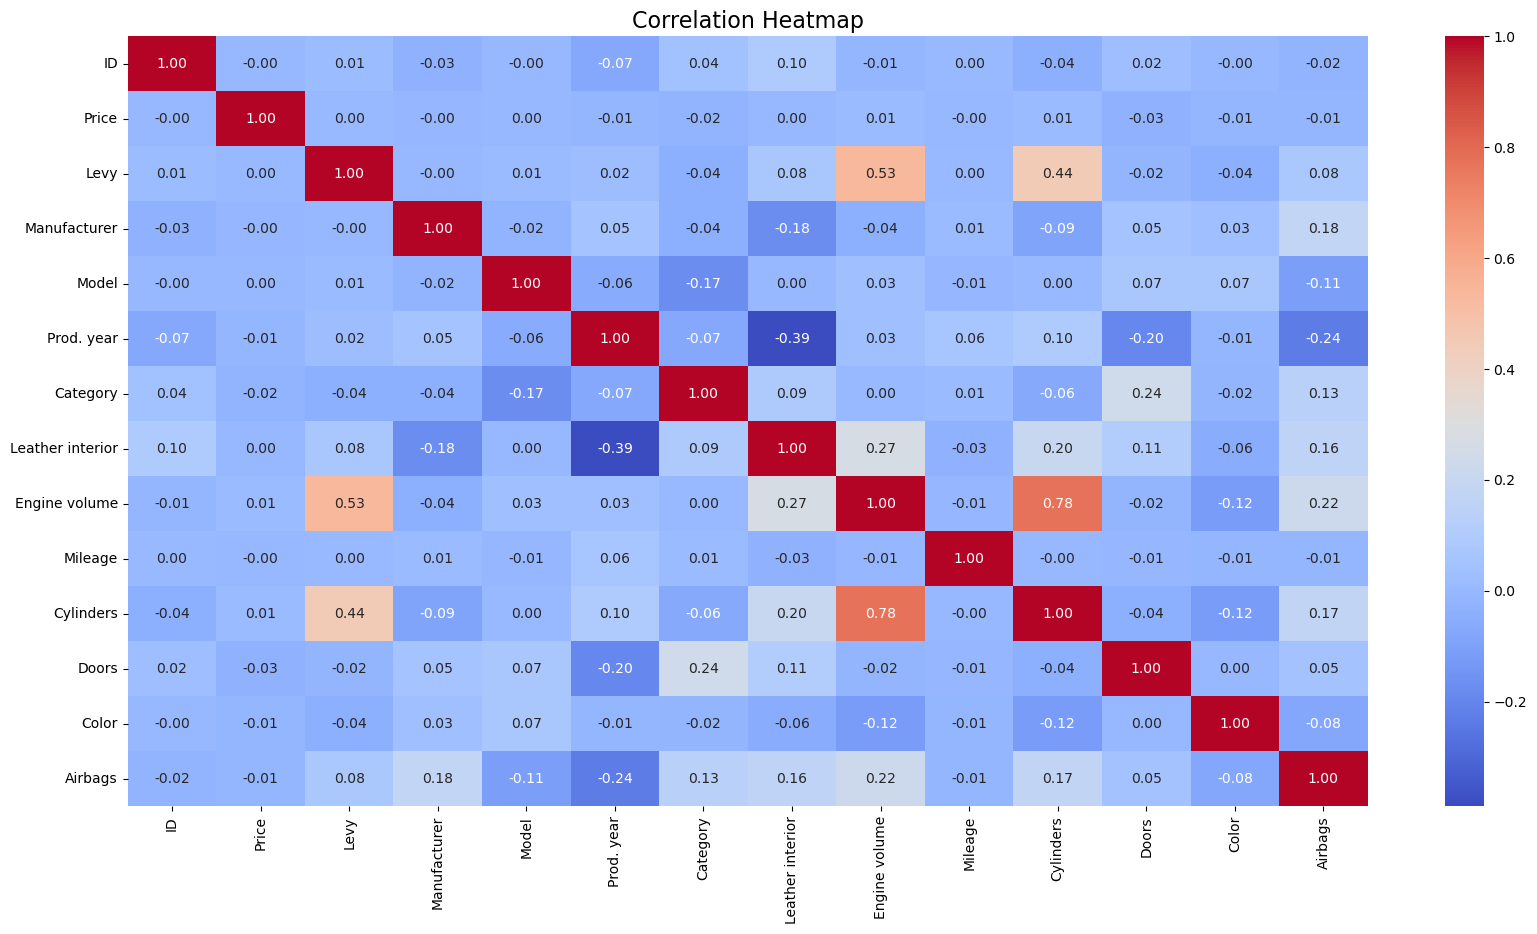

In [24]:
numerical_columns = df.select_dtypes(include=['number']).loc[:, df.var() > 0]
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Handle Outliers 

In [25]:
Q1 = df[numeical_columns[0:6]].quantile(0.25)
Q3 = df[numeical_columns[0:6]].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df[numeical_columns[0:6]] < lower_bound) | (df[numeical_columns[0:6]] > upper_bound)).any(axis=1)]
df.shape

(10899, 31)

In [26]:
z_scores = np.abs((df[numeical_columns[0:6]] - df[numeical_columns[0:6]].mean()) / df[numeical_columns[0:6]].std())
threshold = 5
outliers = (z_scores > threshold)
df.loc[:, numeical_columns[0:6]] = np.where(outliers, df[numeical_columns[0:6]].mean().values, df[numeical_columns[0:6]].values)

In [27]:
for col in numeical_columns[0:6]:
    df.loc[:, col] = mstats.winsorize(df[col], limits=[0.05, 0.05])

# Boxplot & Correlation Matrix After Handling Outliers

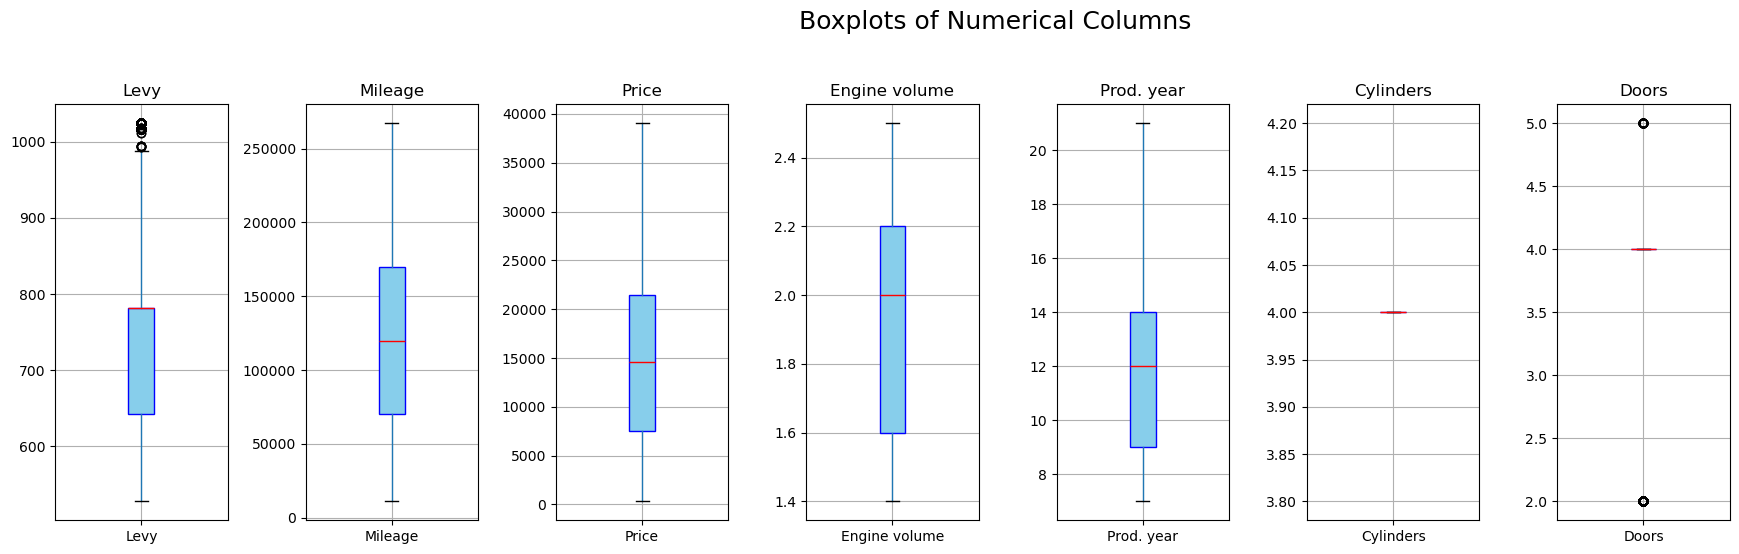

In [28]:
plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numeical_columns, 1):
    plt.subplot(2, 8, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

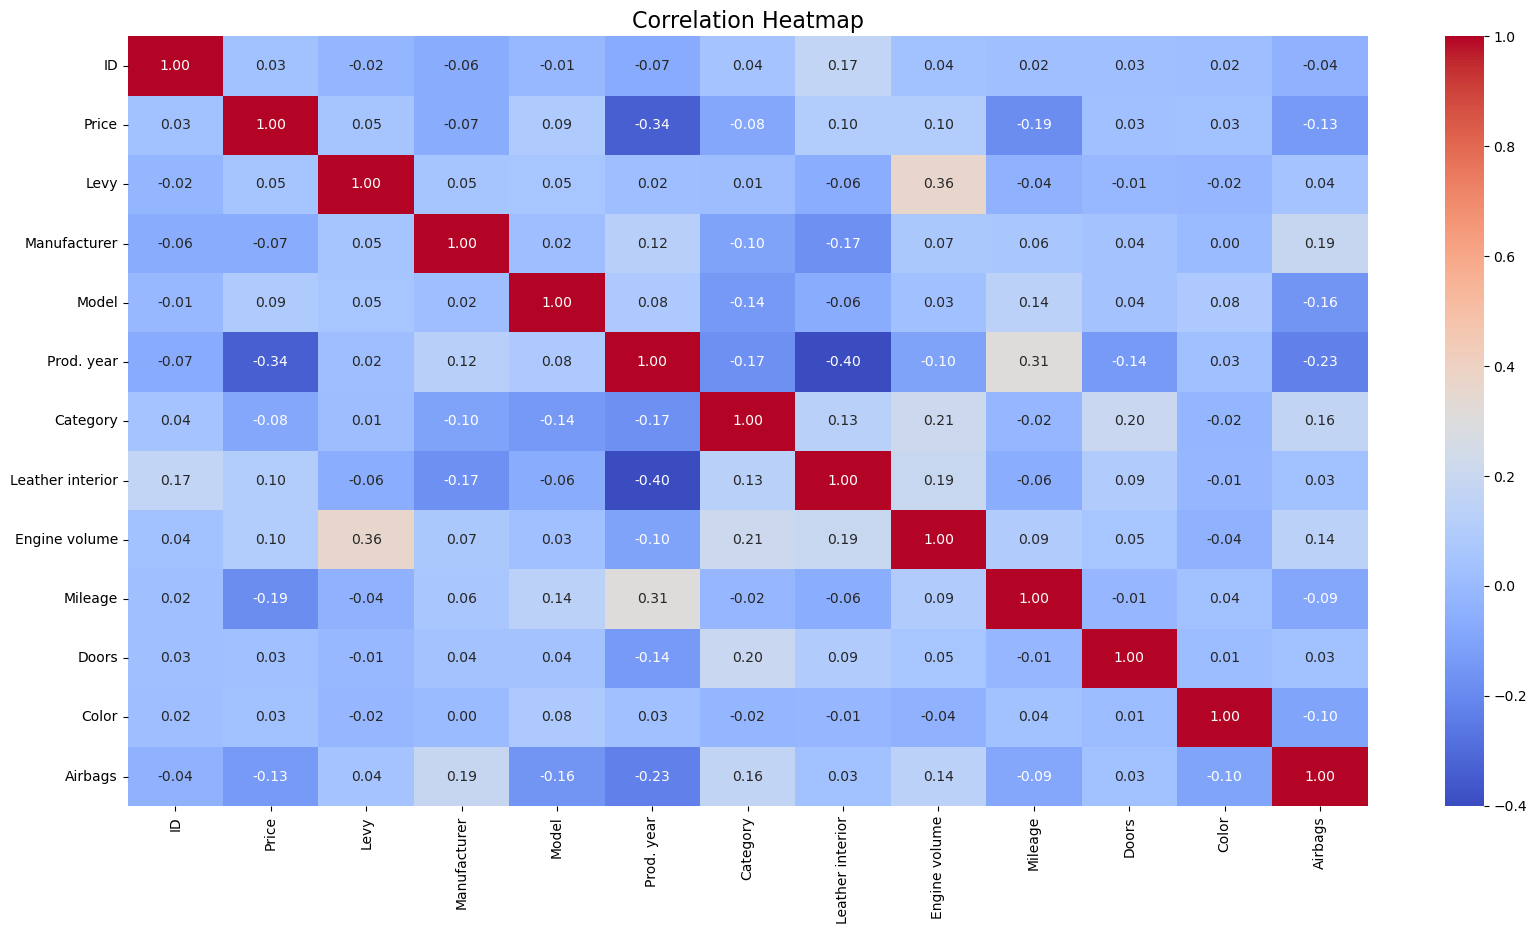

In [29]:
numerical_columns = df.select_dtypes(include=['number']).loc[:, df.var() > 0]
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Split Data Into Train & Test

In [30]:
X = df.drop(['Price', 'ID', 'Cylinders'], axis=1)
y = df['Price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaler

In [32]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)) 

# Linear Regression

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 0.6049024658267896
Mean Absolute Error (MAE): 0.6218488503369849
R-squared: 0.41282426193927746


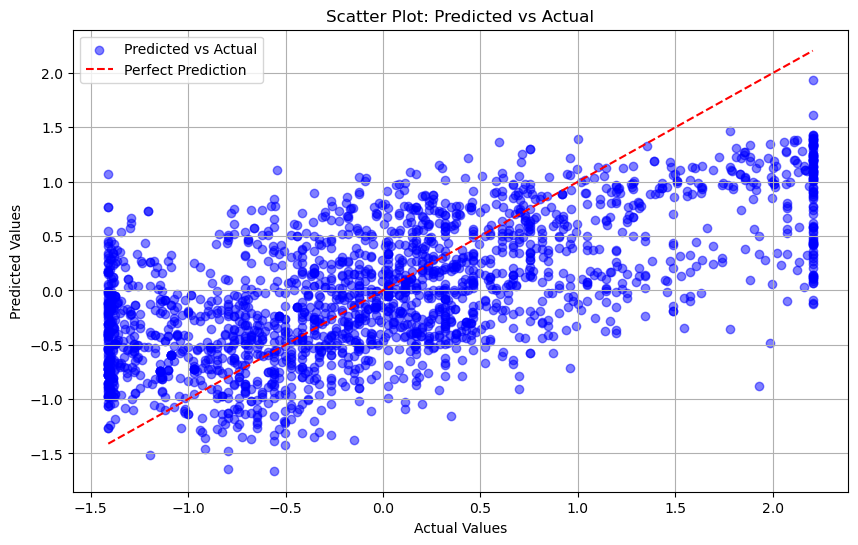

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# KNN Regressor

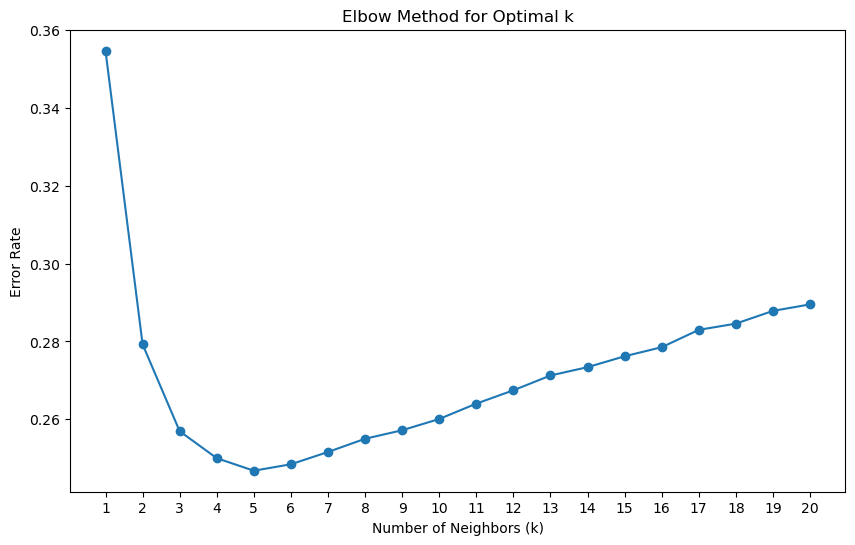

In [36]:
errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    error = 1 - r_squared
    errors.append(error)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), errors, marker='o')
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal k')
plt.show()

In [37]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 0.25424530583168253
Mean Absolute Error (MAE): 0.336628251248143
R-squared: 0.753205378496606


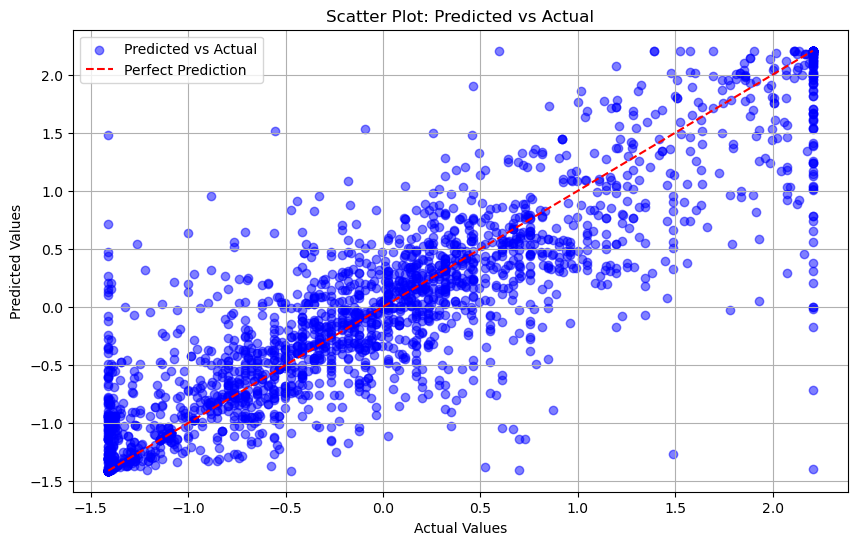

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Regressor

In [39]:
rf_regressor = RandomForestRegressor (
    n_estimators=100,
    random_state=42,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt', 
    bootstrap=True
)
rf_regressor.fit(X_train, y_train.ravel())
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 0.1910996454800197
Mean Absolute Error (MAE): 0.2954528970125665
R-squared: 0.8145005489033609


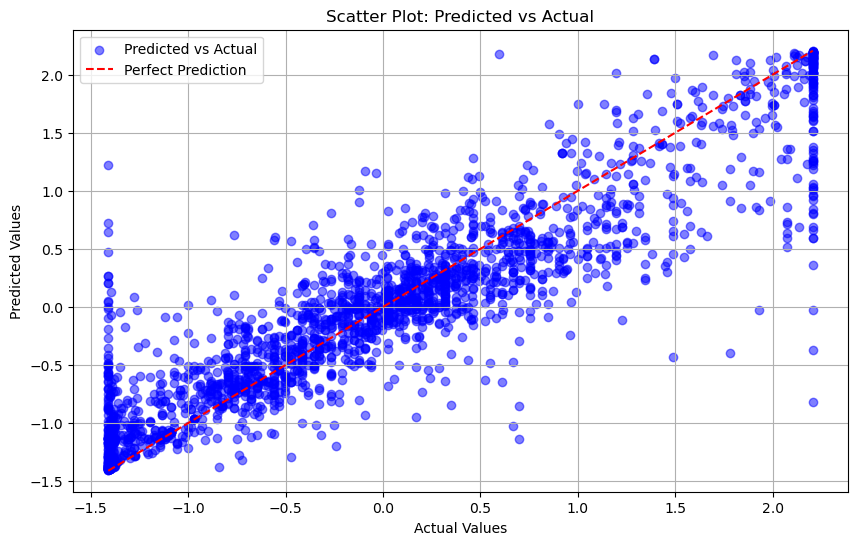

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()